In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFE

In [2]:
train = pd.read_csv("train.csv")

In [3]:
train.shape

(1460, 81)

In [4]:
test = pd.read_csv("test.csv")

In [5]:
test.shape

(1459, 80)

### First Submission

In [6]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [7]:
#rf = RandomForestRegressor()

In [9]:
#rf.fit(X=train[['LotArea','PoolArea']],y=train['SalePrice'])

RandomForestRegressor()

In [10]:
#test['SalePrice'] = rf.predict(test[['LotArea','PoolArea']])

In [11]:
#test[['Id','SalePrice']].to_csv('first_kaggle_submission.csv', index=False)

#### EDA statistics

In [7]:
print('Train Shape', train.shape)
print('Test Shape', test.shape)

Train Shape (1460, 81)
Test Shape (1459, 80)


In [8]:
print(train['1stFlrSF'].head())

0     856
1    1262
2     920
3     961
4    1145
Name: 1stFlrSF, dtype: int64


#### Data Exploration

In [9]:
train['Type'] = 'train'

In [10]:
test['Type'] = 'test'

In [11]:
houses = pd.concat([train,test])

In [12]:
houses.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [13]:
print(houses.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 82 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

#### Working with Datatypes

In [14]:
Yr_col = [x for x in houses.columns if 'Yr' in x]

In [15]:
Yr_col

['GarageYrBlt', 'YrSold']

In [16]:
Year_col = [x for x in houses.columns if 'Year' in x]

In [17]:
Year_col

['YearBuilt', 'YearRemodAdd']

In [18]:
houses['GarageYrBlt'] = pd.to_datetime(houses['GarageYrBlt'], format='%Y', errors='coerce')

In [19]:
houses['GarageYrBlt'] = houses['GarageYrBlt'].dt.year

In [20]:
houses['YrSold'] = pd.to_datetime(houses['YrSold'], format='%Y', errors='coerce')

In [21]:
houses['YrSold'] = houses['YrSold'].dt.year

In [22]:
houses['YearBuilt'] = pd.to_datetime(houses['YearBuilt'], format='%Y', errors='coerce')

In [23]:
houses['YearBuilt'] = houses['YearBuilt'].dt.year

In [24]:
houses['YearRemodAdd'] = pd.to_datetime(houses['YearRemodAdd'], format='%Y', errors='coerce')

In [25]:
houses['YearRemodAdd'] = houses['YearRemodAdd'].dt.year

#### Missing values

In [26]:
result = houses.isna().sum()

pd.set_option('display.max_rows', len(result))

print(result[result>1])


MSZoning           4
LotFrontage      486
Alley           2721
Utilities          2
MasVnrType        24
MasVnrArea        23
BsmtQual          81
BsmtCond          82
BsmtExposure      82
BsmtFinType1      79
BsmtFinType2      80
BsmtFullBath       2
BsmtHalfBath       2
Functional         2
FireplaceQu     1420
GarageType       157
GarageYrBlt      159
GarageFinish     159
GarageQual       159
GarageCond       159
PoolQC          2909
Fence           2348
MiscFeature     2814
SalePrice       1459
dtype: int64


#### Complete the missing values

In [27]:
from sklearn.impute import SimpleImputer


mean_imputer = SimpleImputer(strategy='most_frequent')


houses[['MSZoning']] = mean_imputer.fit_transform(houses[['MSZoning']])

In [28]:
mean_imputer = SimpleImputer(strategy='most_frequent')
houses[['LotFrontage']] = mean_imputer.fit_transform(houses[['LotFrontage']])

/Users/pablofranciscomendozavargas/opt/anaconda3/lib/python3.9/site-packages/sklearn/impute/_base.py:49: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(array)


In [29]:
mean_imputer = SimpleImputer(strategy='most_frequent')
houses[['LotFrontage']] = mean_imputer.fit_transform(houses[['LotFrontage']])

/Users/pablofranciscomendozavargas/opt/anaconda3/lib/python3.9/site-packages/sklearn/impute/_base.py:49: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(array)


In [30]:
mean_imputer = SimpleImputer(strategy='most_frequent')
houses[['Alley']] = mean_imputer.fit_transform(houses[['Alley']])

In [31]:
mean_imputer = SimpleImputer(strategy='most_frequent')
houses[['Alley']] = mean_imputer.fit_transform(houses[['Alley']])

In [32]:
mean_imputer = SimpleImputer(strategy='most_frequent')
houses[['Utilities']] = mean_imputer.fit_transform(houses[['Utilities']])

In [33]:
mean_imputer = SimpleImputer(strategy='most_frequent')
houses[['MasVnrType']] = mean_imputer.fit_transform(houses[['MasVnrType']])

In [34]:
mean_imputer = SimpleImputer(strategy='mean')
houses[['MasVnrArea']] = mean_imputer.fit_transform(houses[['MasVnrArea']])

In [35]:
mean_imputer = SimpleImputer(strategy='most_frequent')
houses[['BsmtQual']] = mean_imputer.fit_transform(houses[['BsmtQual']])

In [36]:
mean_imputer = SimpleImputer(strategy='most_frequent')
houses[['BsmtQual']] = mean_imputer.fit_transform(houses[['BsmtQual']])

In [37]:
mean_imputer = SimpleImputer(strategy='most_frequent')
houses[['BsmtCond']] = mean_imputer.fit_transform(houses[['BsmtCond']])

In [38]:
mean_imputer = SimpleImputer(strategy='most_frequent')
houses[['BsmtCond']] = mean_imputer.fit_transform(houses[['BsmtCond']])

In [39]:
mean_imputer = SimpleImputer(strategy='most_frequent')
houses[['BsmtExposure']] = mean_imputer.fit_transform(houses[['BsmtExposure']])

In [40]:
mean_imputer = SimpleImputer(strategy='most_frequent')
houses[['BsmtFinType1']] = mean_imputer.fit_transform(houses[['BsmtFinType1']])

In [41]:
mean_imputer = SimpleImputer(strategy='most_frequent')
houses[['BsmtFinType2']] = mean_imputer.fit_transform(houses[['BsmtFinType2']])

In [42]:
mean_imputer = SimpleImputer(strategy='most_frequent')
houses[['BsmtFullBath']] = mean_imputer.fit_transform(houses[['BsmtFullBath']])

/Users/pablofranciscomendozavargas/opt/anaconda3/lib/python3.9/site-packages/sklearn/impute/_base.py:49: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(array)


In [43]:
mean_imputer = SimpleImputer(strategy='most_frequent')
houses[['BsmtHalfBath']] = mean_imputer.fit_transform(houses[['BsmtHalfBath']])

/Users/pablofranciscomendozavargas/opt/anaconda3/lib/python3.9/site-packages/sklearn/impute/_base.py:49: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(array)


In [44]:
mean_imputer = SimpleImputer(strategy='most_frequent')
houses[['Functional']] = mean_imputer.fit_transform(houses[['Functional']])

In [45]:
mean_imputer = SimpleImputer(strategy='most_frequent')
houses[['FireplaceQu']] = mean_imputer.fit_transform(houses[['FireplaceQu']])

In [46]:
mean_imputer = SimpleImputer(strategy='most_frequent')
houses[['GarageType']] = mean_imputer.fit_transform(houses[['GarageType']])

In [47]:
mean_imputer = SimpleImputer(strategy='most_frequent')
houses[['GarageYrBlt']] = mean_imputer.fit_transform(houses[['GarageYrBlt']])

/Users/pablofranciscomendozavargas/opt/anaconda3/lib/python3.9/site-packages/sklearn/impute/_base.py:49: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(array)


In [48]:
mean_imputer = SimpleImputer(strategy='most_frequent')
houses[['GarageFinish']] = mean_imputer.fit_transform(houses[['GarageFinish']])

In [49]:
mean_imputer = SimpleImputer(strategy='most_frequent')
houses[['GarageQual']] = mean_imputer.fit_transform(houses[['GarageQual']])

In [50]:
mean_imputer = SimpleImputer(strategy='most_frequent')
houses[['GarageCond']] = mean_imputer.fit_transform(houses[['GarageCond']])

In [51]:
mean_imputer = SimpleImputer(strategy='constant')
houses[['PoolQC']] = mean_imputer.fit_transform(houses[['PoolQC']])

In [52]:
mean_imputer = SimpleImputer(strategy='constant')
houses[['Fence']] = mean_imputer.fit_transform(houses[['Fence']])

In [53]:
mean_imputer = SimpleImputer(strategy='most_frequent')
houses[['MiscFeature']] = mean_imputer.fit_transform(houses[['MiscFeature']])

In [54]:
mean_imputer = SimpleImputer(strategy='most_frequent')
houses[['Electrical']] = mean_imputer.fit_transform(houses[['Electrical']])

In [55]:
mean_imputer = SimpleImputer(strategy='most_frequent')
houses[['KitchenQual']] = mean_imputer.fit_transform(houses[['KitchenQual']])

In [56]:
mean_imputer = SimpleImputer(strategy='most_frequent')
houses[['GarageCars']] = mean_imputer.fit_transform(houses[['GarageCars']])

/Users/pablofranciscomendozavargas/opt/anaconda3/lib/python3.9/site-packages/sklearn/impute/_base.py:49: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(array)


In [57]:
mean_imputer = SimpleImputer(strategy='most_frequent')
houses[['SaleType']] = mean_imputer.fit_transform(houses[['SaleType']])

In [58]:
mean_imputer = SimpleImputer(strategy='most_frequent')
houses[['BsmtFinSF1']] = mean_imputer.fit_transform(houses[['BsmtFinSF1']])

/Users/pablofranciscomendozavargas/opt/anaconda3/lib/python3.9/site-packages/sklearn/impute/_base.py:49: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(array)


In [59]:
mean_imputer = SimpleImputer(strategy='most_frequent')
houses[['BsmtFinSF2']] = mean_imputer.fit_transform(houses[['BsmtFinSF2']])

/Users/pablofranciscomendozavargas/opt/anaconda3/lib/python3.9/site-packages/sklearn/impute/_base.py:49: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(array)


In [60]:
mean_imputer = SimpleImputer(strategy='most_frequent')
houses[['BsmtUnfSF']] = mean_imputer.fit_transform(houses[['BsmtUnfSF']])

/Users/pablofranciscomendozavargas/opt/anaconda3/lib/python3.9/site-packages/sklearn/impute/_base.py:49: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(array)


In [61]:
mean_imputer = SimpleImputer(strategy='most_frequent')
houses[['GarageArea']] = mean_imputer.fit_transform(houses[['GarageArea']])

/Users/pablofranciscomendozavargas/opt/anaconda3/lib/python3.9/site-packages/sklearn/impute/_base.py:49: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(array)


In [62]:
len(houses)

2919

In [63]:
houses['SalePrice'].isna().sum()

1459

#### Feature Engineering

In [64]:
houses['TotalArea'] = houses['1stFlrSF'] + houses['2ndFlrSF'] + houses['TotalBsmtSF']

In [65]:
houses['GardenArea'] = houses['LotArea'] - houses['1stFlrSF']

In [66]:
houses['TotalBath'] = houses['FullBath'] + houses['HalfBath']

In [67]:
houses.drop(['1stFlrSF', '2ndFlrSF', 'TotalBsmtSF', 'LotArea', 'FullBath', 'HalfBath'], axis=1, inplace=True)

#### One Hot Encoding

In [68]:
houses.shape

(2919, 79)

In [69]:
ohe = pd.get_dummies(houses['LotShape'], prefix='LotShape')
houses = pd.concat([houses,ohe], axis=1)

In [70]:
houses.drop('LotShape', axis=1, inplace=True)

In [71]:
ohe = pd.get_dummies(houses['LandContour'], prefix='LandContour')
houses = pd.concat([houses,ohe], axis=1)

In [72]:
houses.drop('LandContour', axis=1, inplace=True)

In [73]:
ohe = pd.get_dummies(houses['LotConfig'], prefix='LotConfig')
houses = pd.concat([houses,ohe], axis=1)

In [74]:
houses.drop('LotConfig', axis=1, inplace=True)

In [75]:
ohe = pd.get_dummies(houses['LandSlope'], prefix='LandSlope')
houses = pd.concat([houses,ohe], axis=1)

In [76]:
houses.drop('LandSlope', axis=1, inplace=True)

In [77]:
ohe = pd.get_dummies(houses['Neighborhood'], prefix='Neighborhood')
houses = pd.concat([houses,ohe], axis=1)

In [78]:
houses.drop('Neighborhood', axis=1, inplace=True)

In [79]:
ohe = pd.get_dummies(houses['Condition1'], prefix='Condition1')
houses = pd.concat([houses,ohe], axis=1)

In [80]:
houses.drop('Condition1', axis=1, inplace=True)

In [81]:
ohe = pd.get_dummies(houses['Condition2'], prefix='Condition2')
houses = pd.concat([houses,ohe], axis=1)

In [82]:
houses.drop('Condition2', axis=1, inplace=True)

In [83]:
ohe = pd.get_dummies(houses['BldgType'], prefix='BldgType')
houses = pd.concat([houses,ohe], axis=1)

In [84]:
houses.drop('BldgType', axis=1, inplace=True)

In [85]:
ohe = pd.get_dummies(houses['HouseStyle'], prefix='HouseStyle')
houses = pd.concat([houses,ohe], axis=1)

In [86]:
houses.drop('HouseStyle', axis=1, inplace=True)

In [87]:
ohe = pd.get_dummies(houses['RoofStyle'], prefix='RoofStyle')
houses = pd.concat([houses,ohe], axis=1)

In [88]:
houses.drop('RoofStyle', axis=1, inplace=True)

In [89]:
ohe = pd.get_dummies(houses['RoofMatl'], prefix='RoofMatl')
houses = pd.concat([houses,ohe], axis=1)

In [90]:
houses.drop('RoofMatl', axis=1, inplace=True)

In [91]:
ohe = pd.get_dummies(houses['Foundation'], prefix='Foundation')
houses = pd.concat([houses,ohe], axis=1)

In [92]:
houses.drop('Foundation', axis=1, inplace=True)

In [93]:
ohe = pd.get_dummies(houses['Heating'], prefix='Heating')
houses = pd.concat([houses,ohe], axis=1)

In [94]:
houses.drop('Heating', axis=1, inplace=True)

In [95]:
ohe = pd.get_dummies(houses['PavedDrive'], prefix='PavedDrive')
houses = pd.concat([houses,ohe], axis=1)

In [96]:
houses.drop('PavedDrive', axis=1, inplace=True)

In [97]:
ohe = pd.get_dummies(houses['MSZoning'], prefix='MSZoning')
houses = pd.concat([houses,ohe], axis=1)

In [98]:
houses.drop('MSZoning', axis=1, inplace=True)

In [99]:
ohe = pd.get_dummies(houses['Alley'], prefix='Alley')
houses = pd.concat([houses,ohe], axis=1)

In [100]:
houses.drop('Alley', axis=1, inplace=True)

In [101]:
ohe = pd.get_dummies(houses['Exterior1st'], prefix='Exterior1st')
houses = pd.concat([houses,ohe], axis=1)

In [102]:
houses.drop('Exterior1st', axis=1, inplace=True)

In [103]:
ohe = pd.get_dummies(houses['Exterior2nd'], prefix='Exterior2nd')
houses = pd.concat([houses,ohe], axis=1)

In [104]:
houses.drop('Exterior2nd', axis=1, inplace=True)

In [105]:
ohe = pd.get_dummies(houses['MasVnrType'], prefix='MasVnrType')
houses = pd.concat([houses,ohe], axis=1)

In [106]:
houses.drop('MasVnrType', axis=1, inplace=True)

In [107]:
ohe = pd.get_dummies(houses['BsmtQual'], prefix='BsmtQual')
houses = pd.concat([houses,ohe], axis=1)

In [108]:
houses.drop('BsmtQual', axis=1, inplace=True)

In [109]:
ohe = pd.get_dummies(houses['BsmtCond'], prefix='BsmtCond')
houses = pd.concat([houses,ohe], axis=1)

In [110]:
houses.drop('BsmtCond', axis=1, inplace=True)

In [111]:
ohe = pd.get_dummies(houses['BsmtExposure'], prefix='BsmtExposure')
houses = pd.concat([houses,ohe], axis=1)

In [112]:
houses.drop('BsmtExposure', axis=1, inplace=True)

In [113]:
ohe = pd.get_dummies(houses['BsmtFinType1'], prefix='BsmtFinType1')
houses = pd.concat([houses,ohe], axis=1)

In [114]:
houses.drop('BsmtFinType1', axis=1, inplace=True)

In [115]:
ohe = pd.get_dummies(houses['BsmtFinType2'], prefix='BsmtFinType2')
houses = pd.concat([houses,ohe], axis=1)

In [116]:
houses.drop('BsmtFinType2', axis=1, inplace=True)

In [117]:
ohe = pd.get_dummies(houses['Electrical'], prefix='Electrical')
houses = pd.concat([houses,ohe], axis=1)

In [118]:
houses.drop('Electrical', axis=1, inplace=True)

In [119]:
ohe = pd.get_dummies(houses['KitchenQual'], prefix='KitchenQual')
houses = pd.concat([houses,ohe], axis=1)

In [120]:
houses.drop('KitchenQual', axis=1, inplace=True)

In [121]:
ohe = pd.get_dummies(houses['Functional'], prefix='Functional')
houses = pd.concat([houses,ohe], axis=1)

In [122]:
houses.drop('Functional', axis=1, inplace=True)

In [123]:
ohe = pd.get_dummies(houses['FireplaceQu'], prefix='FireplaceQu')
houses = pd.concat([houses,ohe], axis=1)

In [124]:
houses.drop('FireplaceQu', axis=1, inplace=True)

In [125]:
ohe = pd.get_dummies(houses['GarageType'], prefix='GarageType')
houses = pd.concat([houses,ohe], axis=1)

In [126]:
houses.drop('GarageType', axis=1, inplace=True)

In [127]:
ohe = pd.get_dummies(houses['GarageFinish'], prefix='GarageFinish')
houses = pd.concat([houses,ohe], axis=1)

In [128]:
houses.drop('GarageFinish', axis=1, inplace=True)

In [129]:
ohe = pd.get_dummies(houses['GarageQual'], prefix='GarageQual')
houses = pd.concat([houses,ohe], axis=1)

In [130]:
houses.drop('GarageQual', axis=1, inplace=True)

In [131]:
ohe = pd.get_dummies(houses['MiscFeature'], prefix='MiscFeature')
houses = pd.concat([houses,ohe], axis=1)

In [132]:
houses.drop('MiscFeature', axis=1, inplace=True)

In [133]:
ohe = pd.get_dummies(houses['SaleCondition'], prefix='SaleCondition')
houses = pd.concat([houses,ohe], axis=1)

In [134]:
houses.drop('SaleCondition', axis=1, inplace=True)

In [135]:
ohe = pd.get_dummies(houses['GarageCond'], prefix='GarageCond')
houses = pd.concat([houses,ohe], axis=1)

In [136]:
houses.drop('GarageCond', axis=1, inplace=True)

In [137]:
ohe = pd.get_dummies(houses['PoolQC'], prefix='PoolQC')
houses = pd.concat([houses,ohe], axis=1)

In [138]:
houses.drop('PoolQC', axis=1, inplace=True)

In [139]:
ohe = pd.get_dummies(houses['Fence'], prefix='Fence')
houses = pd.concat([houses,ohe], axis=1)

In [140]:
houses.drop('Fence', axis=1, inplace=True)

In [141]:
ohe = pd.get_dummies(houses['SaleType'], prefix='SaleType')
houses = pd.concat([houses,ohe], axis=1)

In [142]:
houses.drop('SaleType', axis=1, inplace=True)

#### Label Encoding

In [143]:
le = LabelEncoder()
houses['CentralAir'] = le.fit_transform(houses['CentralAir'])
houses['CentralAir'].unique()

array([1, 0])

In [144]:
le = LabelEncoder()
houses['Street'] = le.fit_transform(houses['Street'])
houses['Street'].unique()

array([1, 0])

In [145]:
le = LabelEncoder()
houses['Utilities'] = le.fit_transform(houses['Utilities'])
houses['Utilities'].unique()

array([0, 1])

In [146]:
mapping = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po':1}

In [147]:
houses['ExterQual'] = houses['ExterQual'].replace(mapping)

In [148]:
houses['ExterCond'] = houses['ExterCond'].replace(mapping)

In [149]:
houses['HeatingQC'] = houses['HeatingQC'].replace(mapping)

In [150]:
houses.shape

(2919, 276)

#### Features with little variance

In [151]:
pd.set_option('display.float_format', '{:.2f}'.format)
normalized_houses = houses / houses.mean()
pd.set_option('display.max_rows', len(normalized_houses))
print(normalized_houses.var())

3SsnPorch                 93.69
Alley_Grvl                 0.03
Alley_Pave                36.44
BedroomAbvGr               0.08
BldgType_1Fam              0.20
BldgType_2fmCon           46.10
BldgType_Duplex           25.79
BldgType_Twnhs            29.42
BldgType_TwnhsE           11.86
BsmtCond_Fa               27.08
BsmtCond_Gd               22.93
BsmtCond_Po              583.00
BsmtCond_TA                0.09
BsmtExposure_Av            5.99
BsmtExposure_Gd            9.58
BsmtExposure_Mn           11.22
BsmtExposure_No            0.47
BsmtFinSF1                 1.07
BsmtFinSF2                11.65
BsmtFinType1_ALQ           5.81
BsmtFinType1_BLQ           9.85
BsmtFinType1_GLQ           2.44
BsmtFinType1_LwQ          17.96
BsmtFinType1_Rec           9.14
BsmtFinType1_Unf           2.14
BsmtFinType2_ALQ          55.15
BsmtFinType2_BLQ          41.94
BsmtFinType2_GLQ          84.88
BsmtFinType2_LwQ          32.56
BsmtFinType2_Rec          26.81
BsmtFinType2_Unf           0.13
BsmtFull

/var/folders/sq/dl_vqf5n05z5z05q_14d_wmw0000gn/T/ipykernel_55811/1724307616.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  normalized_houses = houses / houses.mean()


In [152]:
no_dummies_column = [x for x in normalized_houses.columns if '_' not in x]

In [153]:
len(no_dummies_column)

42

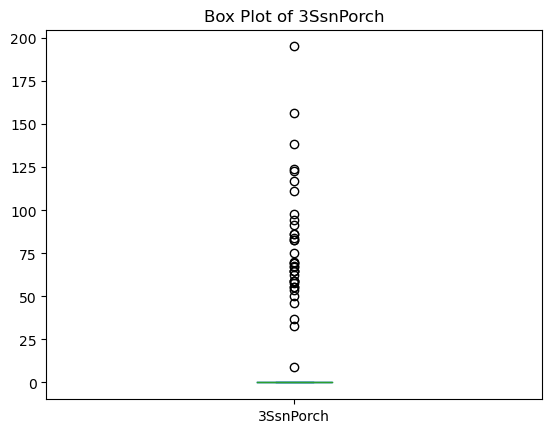

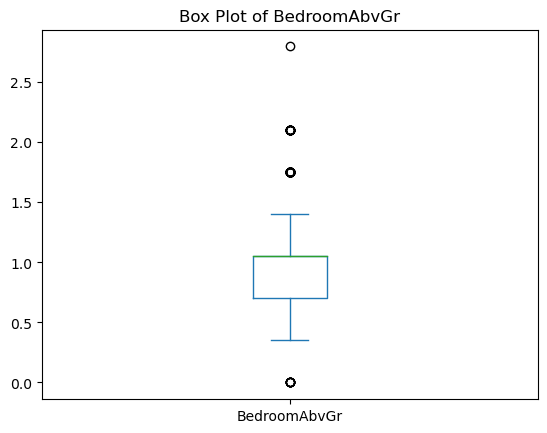

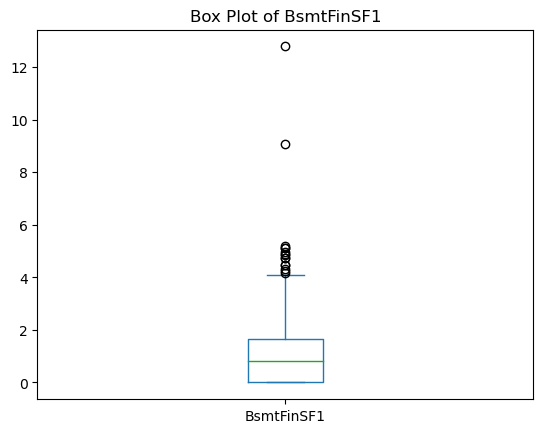

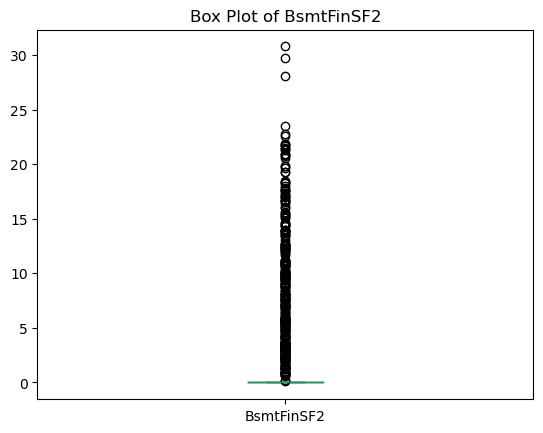

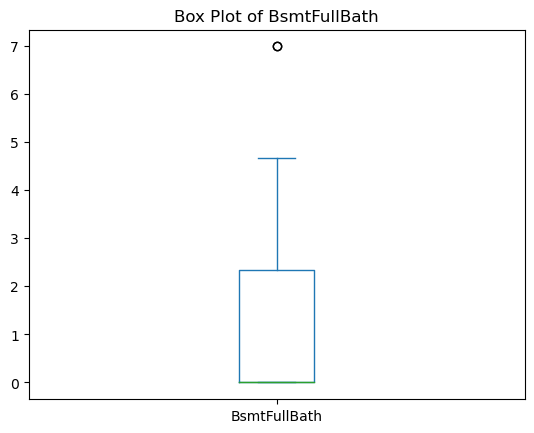

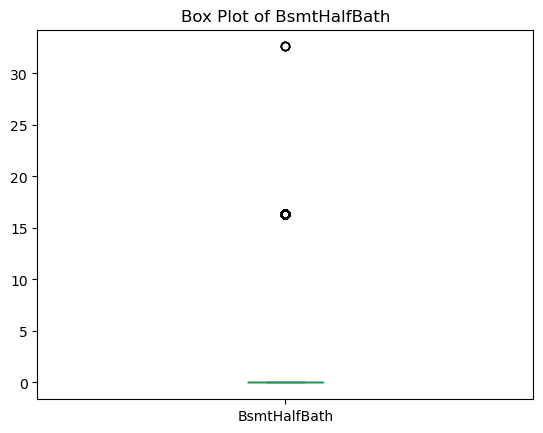

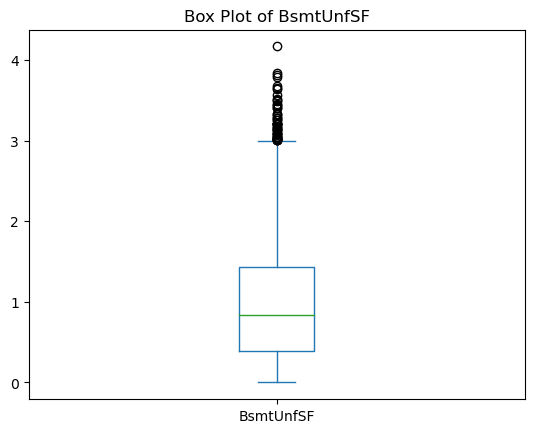

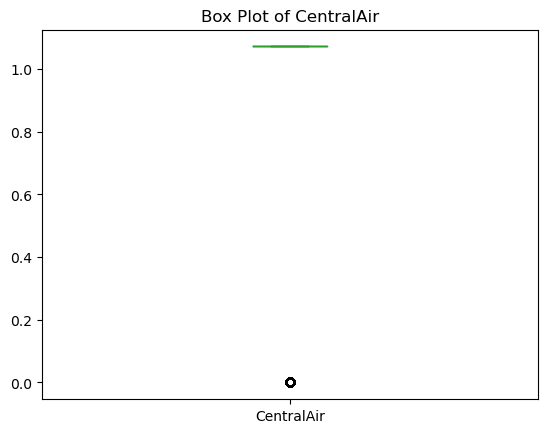

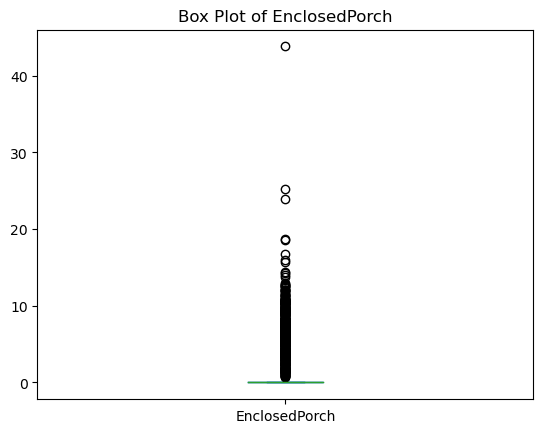

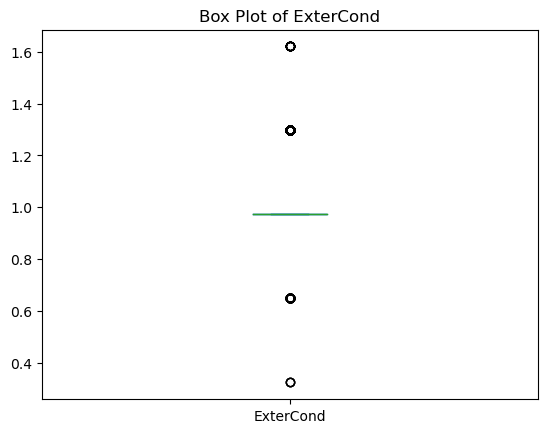

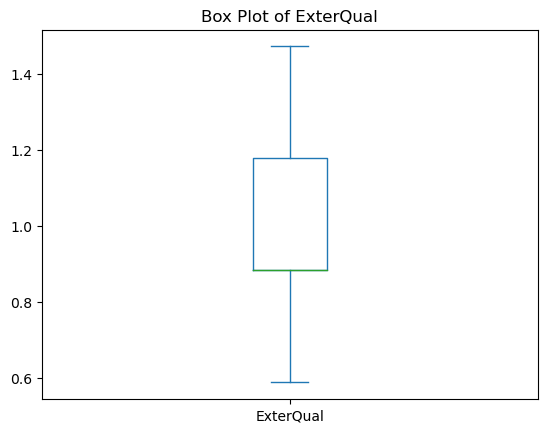

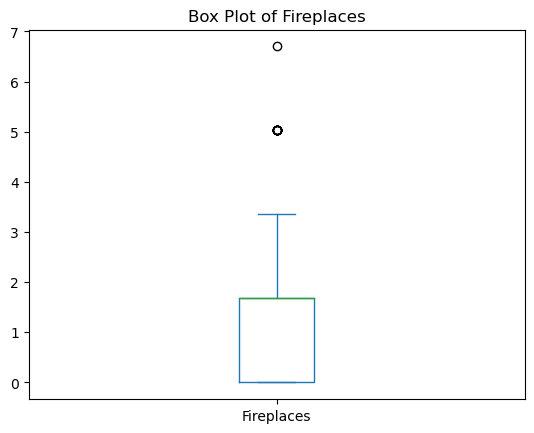

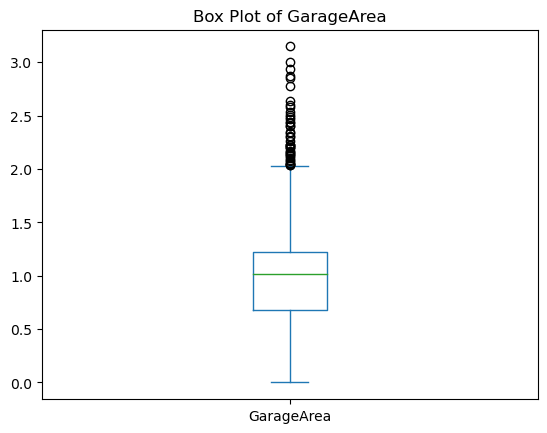

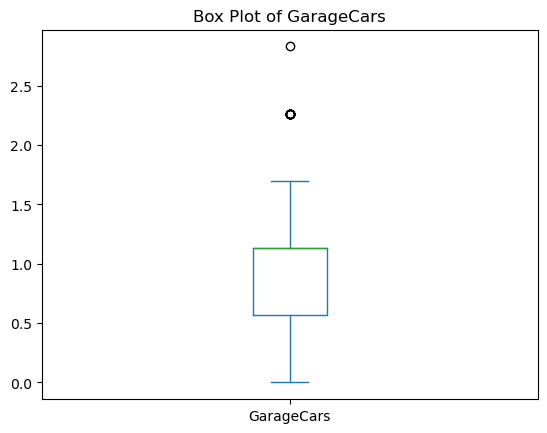

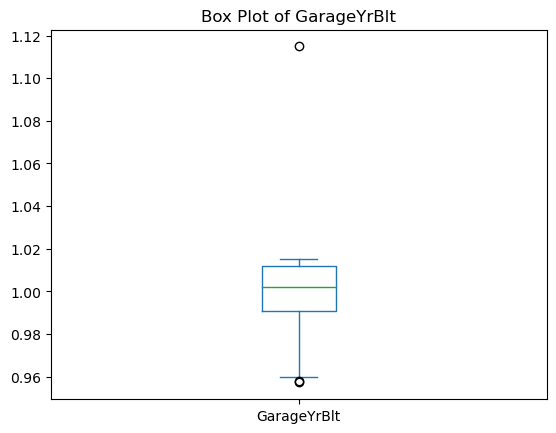

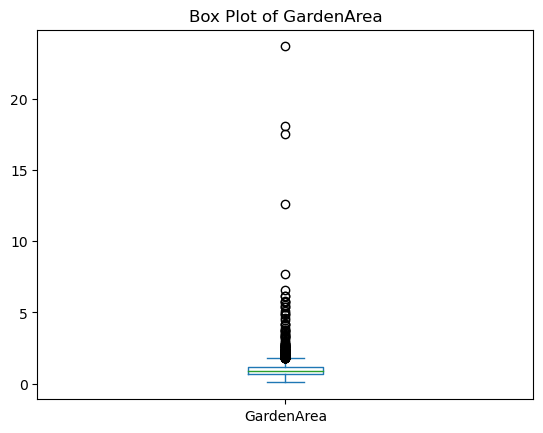

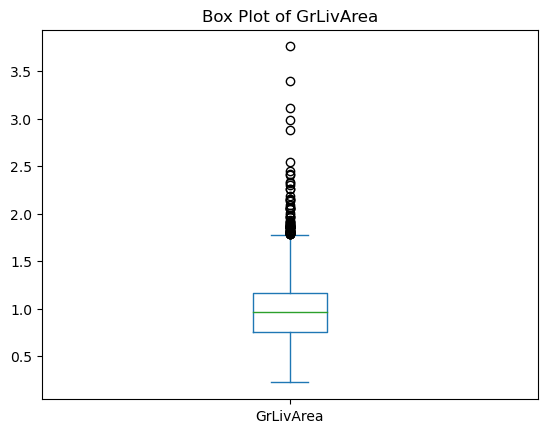

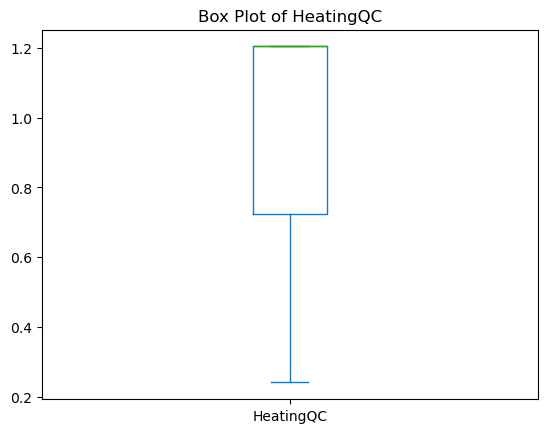

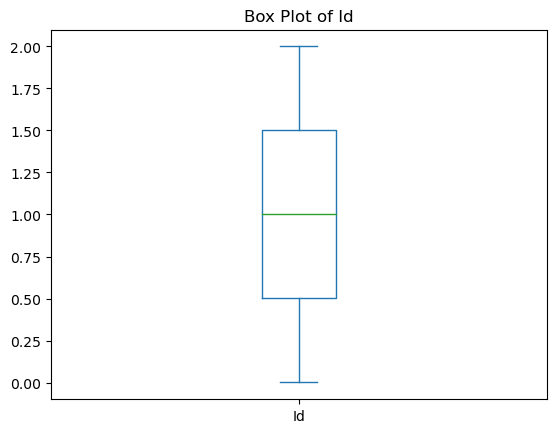

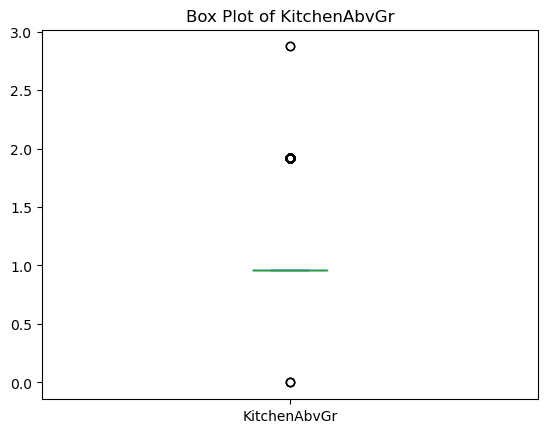

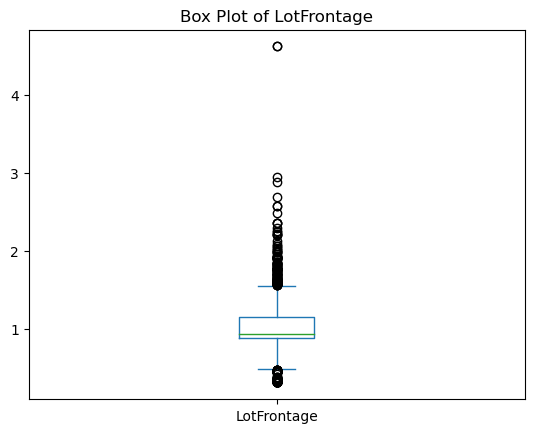

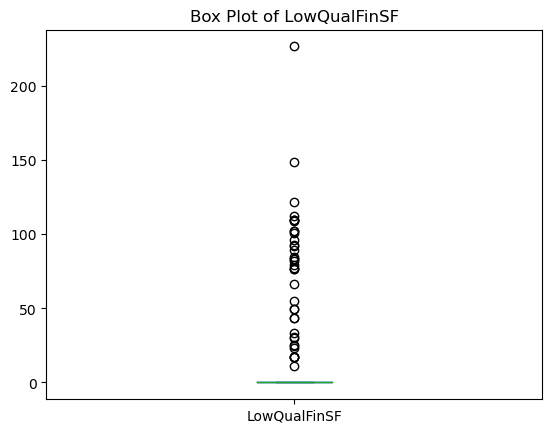

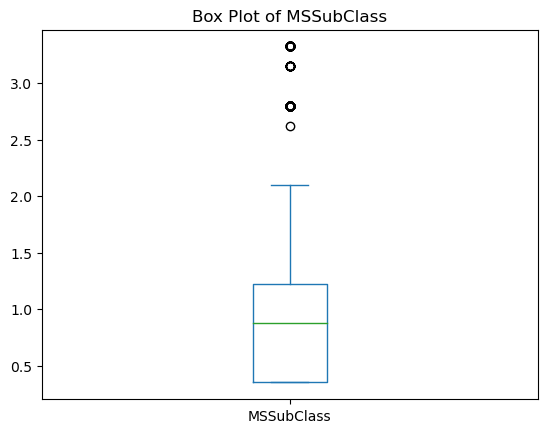

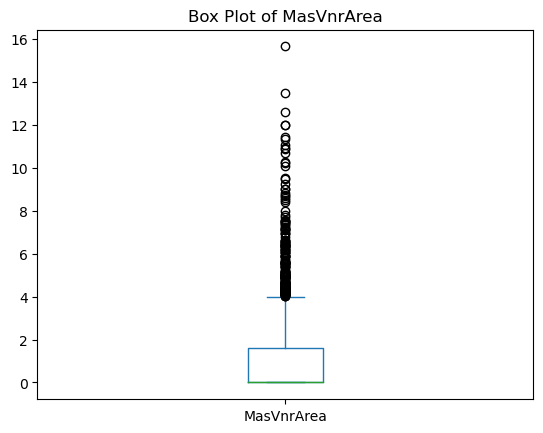

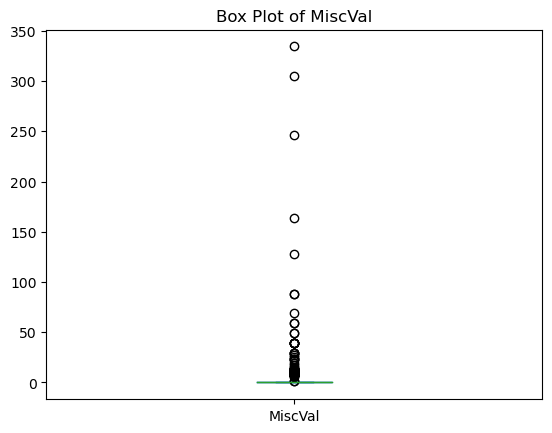

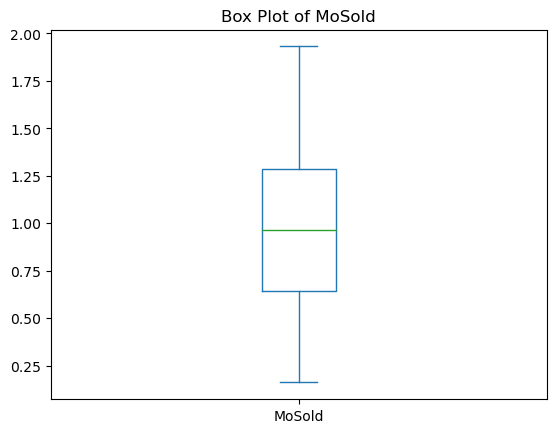

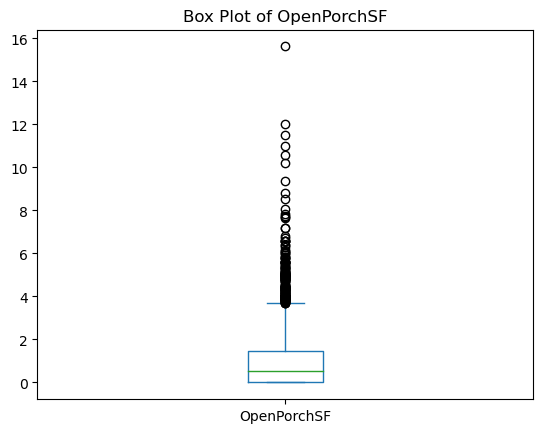

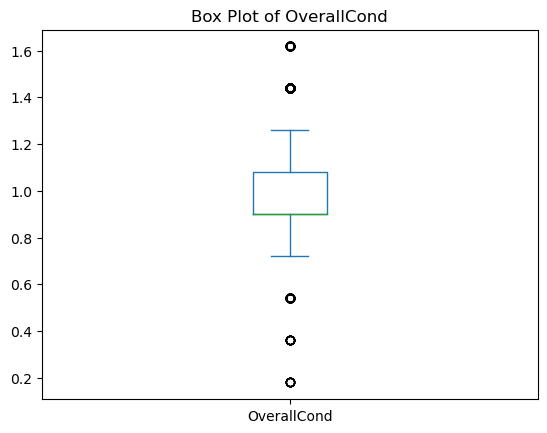

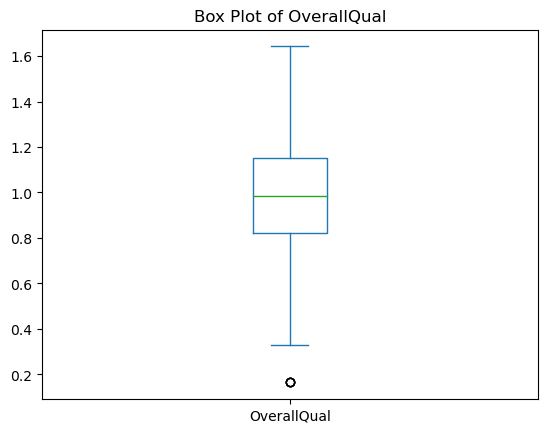

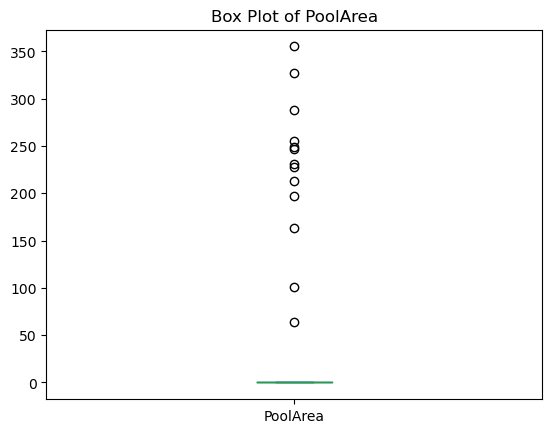

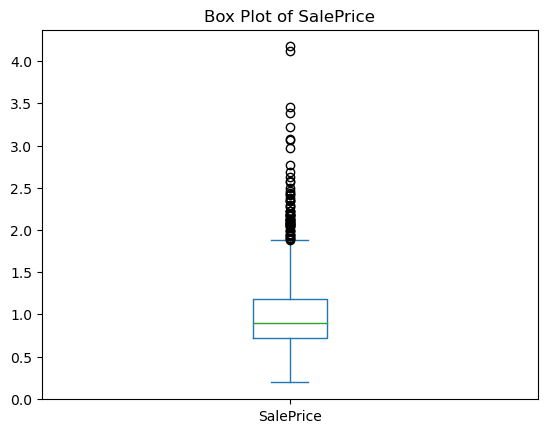

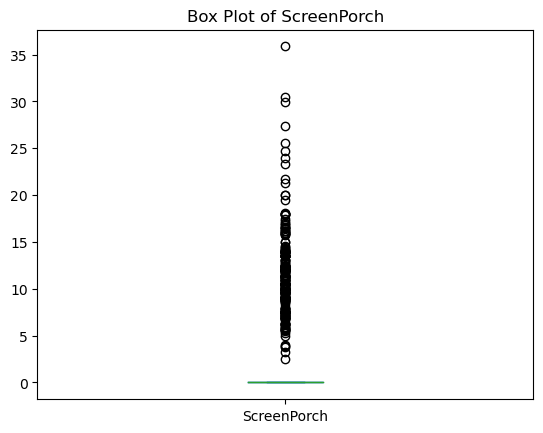

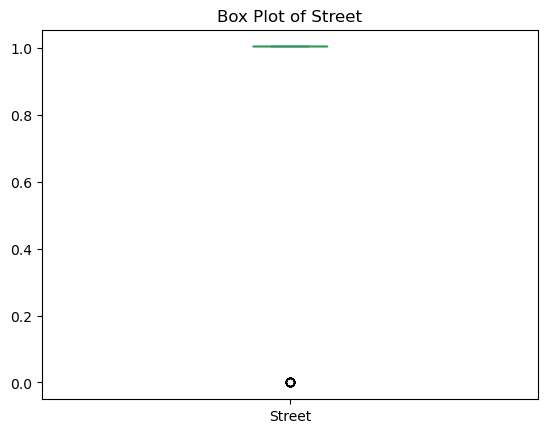

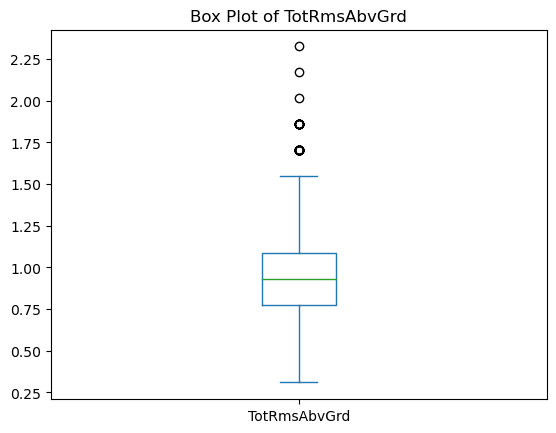

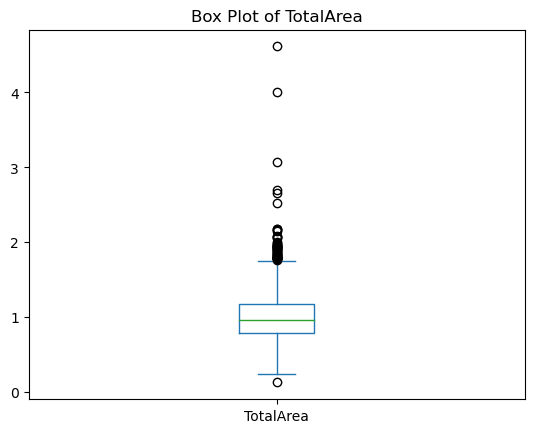

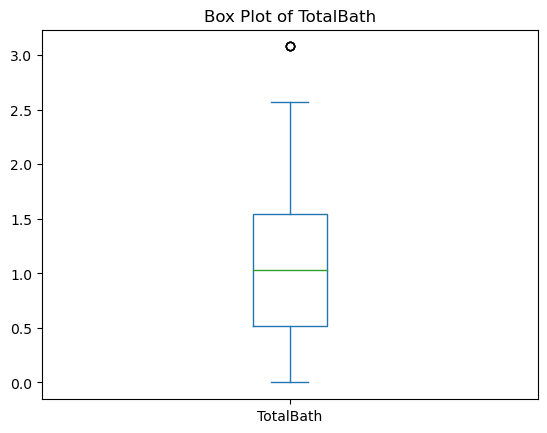

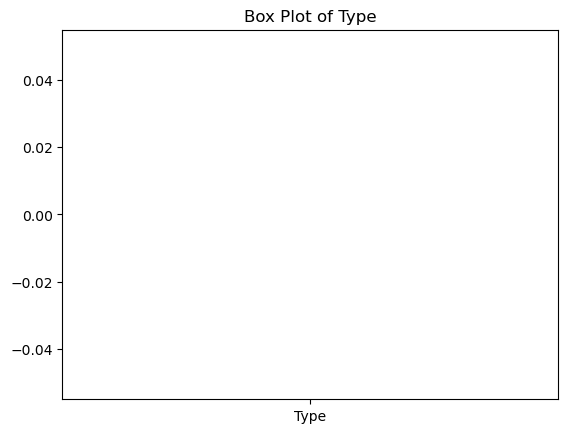

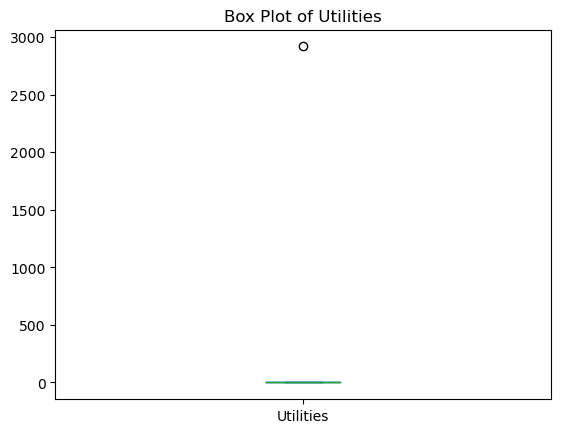

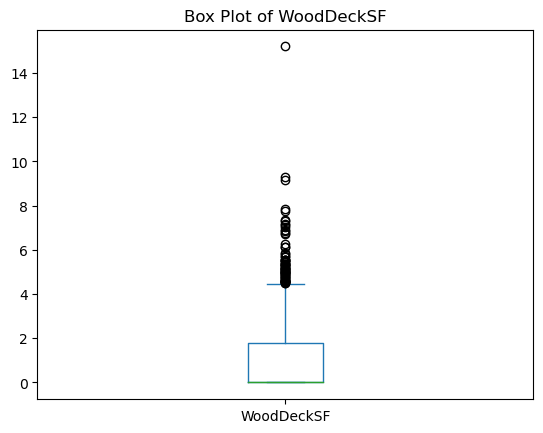

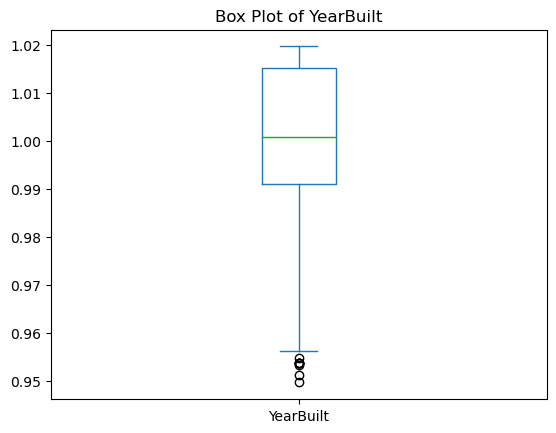

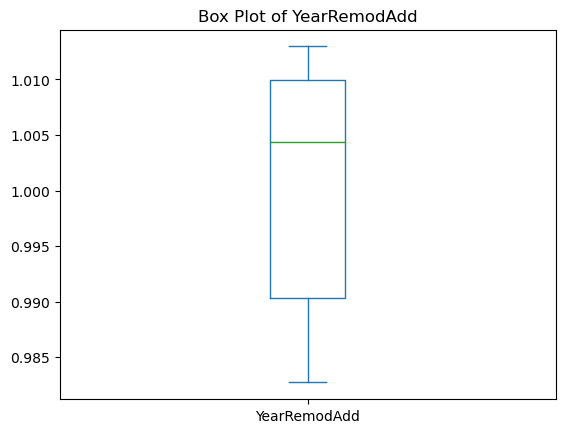

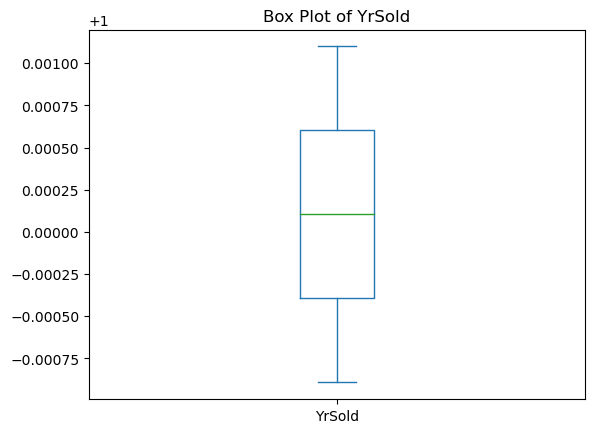

In [154]:
for column in no_dummies_column:
    plt.figure()
    normalized_houses[column].plot.box()
    plt.title(f'Box Plot of {column}')
    plt.show()

In [155]:
unique_values = houses['YrSold'].unique()

# Format the unique values with a specific number of decimal places
formatted_values = ["{:.2f}".format(value) for value in unique_values]

for value in formatted_values:
    print(value)


2008.00
2007.00
2006.00
2009.00
2010.00


#### Visualizing the correlation

In [156]:
houses_cor = houses[no_dummies_column]

In [157]:
correlation_matrix = houses_cor.corr()

high_correlation_data = []
threshold = 0.8

for column in correlation_matrix.columns:
    correlated_columns = correlation_matrix.index[correlation_matrix[column] > threshold].tolist()
    correlated_columns.remove(column)
    correlated_values = correlation_matrix[column][correlated_columns].tolist()
    high_correlation_data.extend([(column, corr_column, corr_value) for corr_column, corr_value in zip(correlated_columns, correlated_values)])

high_correlation_df = pd.DataFrame(high_correlation_data, columns=['Column1', 'Column2', 'Correlation'])

high_correlation_df

,Column1,Column2,Correlation
0,GarageArea,GarageCars,0.89
1,GarageCars,GarageArea,0.89
2,GrLivArea,TotRmsAbvGrd,0.81
3,GrLivArea,TotalArea,0.87
4,TotRmsAbvGrd,GrLivArea,0.81
5,TotalArea,GrLivArea,0.87


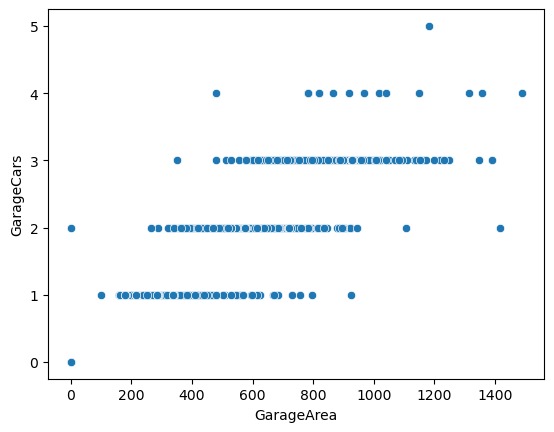

In [158]:
sns.scatterplot(x='GarageArea',y='GarageCars',data=houses_cor)
plt.show()

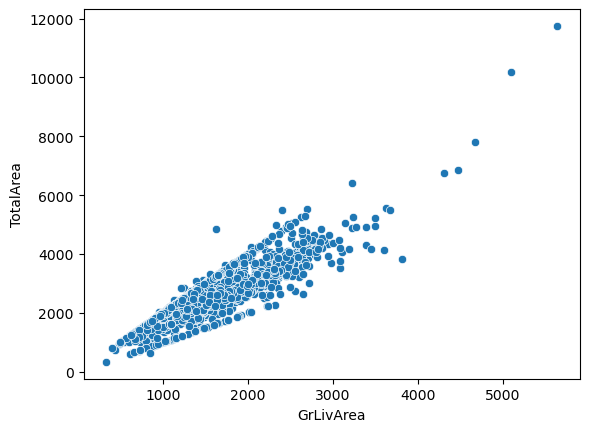

In [159]:
sns.scatterplot(x='GrLivArea',y='TotalArea',data=houses_cor)
plt.show()

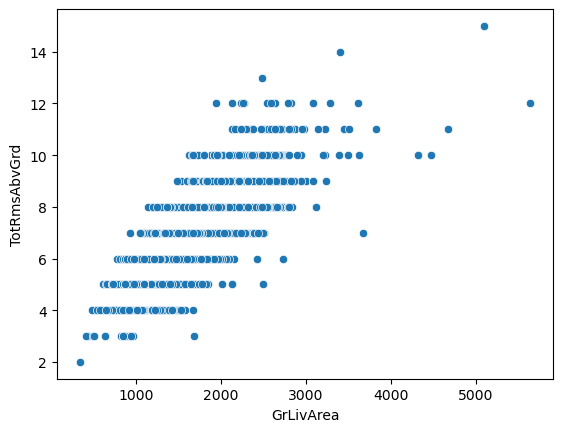

In [160]:
sns.scatterplot(x='GrLivArea',y='TotRmsAbvGrd',data=houses_cor)
plt.show()

#### Scaler data

In [161]:
no_dummies_column = [x for x in houses.columns if '_' not in x]

In [162]:
len(houses['MSSubClass'].unique())

16

In [163]:
std_column = [x for x in no_dummies_column if len(houses[x].unique())>150]

In [164]:
std_column

['Id',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'SalePrice',
 'TotalArea',
 'GardenArea']

In [165]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [166]:
houses['MasVnrArea'].head(2)

0   196.00
1     0.00
Name: MasVnrArea, dtype: float64

In [167]:
houses['BsmtFinSF1'].head(2)

0   706.00
1   978.00
Name: BsmtFinSF1, dtype: float64

In [168]:
numerical_features = ['MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'TotalArea',
 'GardenArea']

In [169]:
houses[numerical_features] = scaler.fit_transform(houses[numerical_features])

In [170]:
houses['BsmtFinSF1'].head(2)

0   0.58
1   1.18
Name: BsmtFinSF1, dtype: float64

In [171]:
houses.head()

,Id,MSSubClass,LotFrontage,Street,Utilities,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,...,Fence_missing_value,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD
0,1,60,65.00,1,0,7,5,2003,2003,0.53,...,1,0,0,0,0,0,0,0,0,1
1,2,20,80.00,1,0,6,8,1976,1976,-0.57,...,1,0,0,0,0,0,0,0,0,1
2,3,60,68.00,1,0,7,5,2001,2002,0.33,...,1,0,0,0,0,0,0,0,0,1
3,4,70,60.00,1,0,7,5,1915,1970,-0.57,...,1,0,0,0,0,0,0,0,0,1
4,5,60,84.00,1,0,8,5,2000,2000,1.39,...,1,0,0,0,0,0,0,0,0,1


#### Split train and test

In [172]:
train = houses[houses['Type']=='train']

In [173]:
train.shape

(1460, 276)

In [174]:
train.drop('Type', axis=1, inplace=True)

/var/folders/sq/dl_vqf5n05z5z05q_14d_wmw0000gn/T/ipykernel_55811/1447841662.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.drop('Type', axis=1, inplace=True)


In [175]:
test = houses[houses['Type']=='test']

In [176]:
test.shape

(1459, 276)

In [177]:
test.drop('Type', axis=1, inplace=True)

/var/folders/sq/dl_vqf5n05z5z05q_14d_wmw0000gn/T/ipykernel_55811/1167011423.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.drop('Type', axis=1, inplace=True)


#### Filter NA Columns

In [178]:
result = train.isna().sum()

pd.set_option('display.max_rows', len(result))

print(result[result==1])

Series([], dtype: int64)


In [179]:
result = test.isna().sum()

pd.set_option('display.max_rows', len(result))

print(result[result==1])

TotalArea    1
dtype: int64


In [180]:
test.columns[test.isna().sum() > 1]

Index(['SalePrice'], dtype='object')

In [181]:
average_total_area = test['TotalArea'].mean()
test['TotalArea'].fillna(average_total_area, inplace=True)

/var/folders/sq/dl_vqf5n05z5z05q_14d_wmw0000gn/T/ipykernel_55811/3434746067.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['TotalArea'].fillna(average_total_area, inplace=True)


In [182]:
result = test.isna().sum()

pd.set_option('display.max_rows', len(result))

print(result[result==1])

Series([], dtype: int64)


In [183]:
average_total_area = test['GarageArea'].mean()
test['GarageArea'].fillna(average_total_area, inplace=True)

/var/folders/sq/dl_vqf5n05z5z05q_14d_wmw0000gn/T/ipykernel_55811/2045763681.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['GarageArea'].fillna(average_total_area, inplace=True)


#### Prepare the dataframe for the model

In [184]:
len(train.columns)

275

In [185]:
y_temp = train['SalePrice']

In [186]:
X_temp = train.drop('SalePrice', axis=1)

In [187]:
X_temp.shape

(1460, 274)

In [188]:
y_temp.shape

(1460,)

In [189]:
test = test.drop('SalePrice', axis=1)

In [190]:
len(test.columns)

274

#### Creating train, test and validation datasets

In [197]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

In [199]:
X_train, X_val, y_train, y_val = train_test_split(X_temp,y_temp,test_size=0.20,random_state=1111)

#### Basic Validation

In [200]:
# First Model
rfr = RandomForestRegressor(n_estimators=25, random_state=1111, max_features=11)
rfr.fit(X_train,y_train)

RandomForestRegressor(max_features=11, n_estimators=25, random_state=1111)

In [201]:
print('The training error is {}'.format(mean_absolute_error(y_train,rfr.predict(X_train))))

The training error is 7839.80890410959


In [203]:
print('The testing error is {}'.format(mean_absolute_error(y_val, rfr.predict(X_val))))

The training error is 17768.64178082192


In [216]:
# Second Model
rfr2 = RandomForestRegressor(n_estimators=1000, random_state=1111)
rfr2.fit(X_train,y_train)

RandomForestRegressor(n_estimators=1000, random_state=1111)

In [217]:
print('The training error is {}'.format(mean_absolute_error(y_train, rfr2.predict(X_train))))
print('The testing error is {}'.format(mean_absolute_error(y_val, rfr2.predict(X_val))))

The training error is 6464.658528253425
The testing error is 15308.575195205482


In [218]:
test['SalePrice'] = rfr2.predict(test)

In [219]:
test[['Id','SalePrice']].to_csv('six_kaggle_submission.csv', index=False)

#### Cross Validation

In [220]:
from sklearn.model_selection import KFold

In [221]:
kf = KFold(n_splits = 5, shuffle = True, random_state = True)

#### Feature Selection

In [177]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import r2_score

In [177]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [178]:
rf = RandomForestRegressor(random_state=0)

In [179]:
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [180]:
r2 = r2_score(y_test, rf.predict(X_test))

In [181]:
r2

0.8367119225240831

In [184]:
print(f"{r2:.1%} accuracy on test set.") 

83.7% accuracy on test set.


#### Manual Feature Selection

In [192]:
mask = rf.feature_importances_ > 0.15

In [193]:
reduced_X = X.loc[:,mask]

In [194]:
reduced_X.columns

Index(['OverallQual', 'TotalArea'], dtype='object')

#### Recursive Feature Selection

In [188]:
# Select 05 features
#rfe = RFE(estimator=RandomForestRegressor(), n_features_to_select=5, step=2, verbose=1)

In [ ]:
#rfe.fit(X, y)

Fitting estimator with 274 features.
Fitting estimator with 272 features.
Fitting estimator with 270 features.
Fitting estimator with 268 features.
Fitting estimator with 266 features.
Fitting estimator with 264 features.
Fitting estimator with 262 features.


In [199]:
#mask = rfe.support_

In [201]:
#reduced_X = X.loc[:, mask]
#print(reduced_X.columns)

Index(['OverallQual', 'YearBuilt', 'GrLivArea', 'TotalArea', 'GardenArea'], dtype='object')


In [203]:
#r2 = r2_score(y_test, rfe.predict(X_test))

In [204]:
#r2

0.8455123957726562

In [205]:
#test['SalePrice'] = rfe.predict(test)

In [206]:
#test[['Id','SalePrice']].to_csv('fifth_kaggle_submission.csv', index=False)

In [178]:
# Select 10 features
rfe2 = RFE(estimator=RandomForestRegressor(), n_features_to_select=10, step=20, verbose=1)

In [180]:
rfe2.fit(X, y)

Fitting estimator with 274 features.
Fitting estimator with 254 features.
Fitting estimator with 234 features.
Fitting estimator with 214 features.
Fitting estimator with 194 features.
Fitting estimator with 174 features.
Fitting estimator with 154 features.
Fitting estimator with 134 features.
Fitting estimator with 114 features.
Fitting estimator with 94 features.
Fitting estimator with 74 features.
Fitting estimator with 54 features.
Fitting estimator with 34 features.
Fitting estimator with 14 features.


RFE(estimator=RandomForestRegressor(), n_features_to_select=10, step=20,
    verbose=1)

In [181]:
test['SalePrice'] = rfe2.predict(test)

In [182]:
test[['Id','SalePrice']].to_csv('six_kaggle_submission.csv', index=False)

#### Apply the model 

In [166]:
rf_3 = RandomForestRegressor()

In [167]:
def has_value_ta(dataframe):
    for column in dataframe.columns:
        if 'train' in dataframe[column].values:
            return True, column
    return False, None

# Check if 'TA' is included in the dataframe and get the column name
has_ta, column_with_ta = has_value_ta(x)

if has_ta:
    print(f"'TA' is included in column '{column_with_ta}'.")
else:
    print("'TA' is not included in any column.")

'TA' is not included in any column.


/var/folders/sq/dl_vqf5n05z5z05q_14d_wmw0000gn/T/ipykernel_32738/4108255698.py:3: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'train' in dataframe[column].values:


In [168]:
rf_3.fit(X=x,y=y)

RandomForestRegressor()

In [169]:
test['SalePrice'] = rf_3.predict(test)

#### Validate name before

In [170]:
test[['Id','SalePrice']].to_csv('fourth_kaggle_submission.csv', index=False)